# Opening a Bar and Restaurant in Bali

In [1]:
# A description of the problem and a discussion of the background. (15 marks)

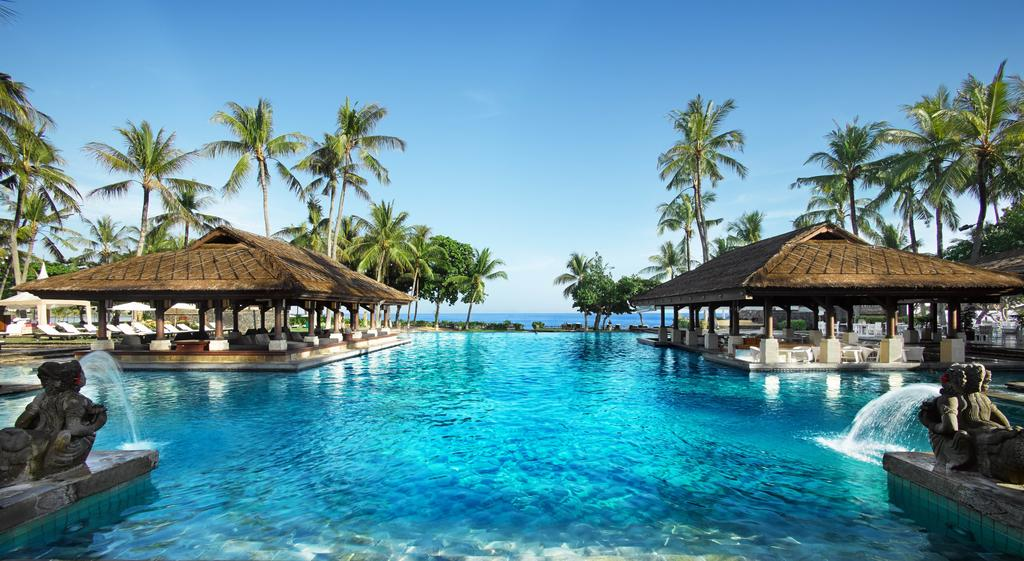

### 1. Introduction
Bali, which has been called the islands of the gods, is one of the most captivating and mesmerizing place to visit. There are many things that you can do in Bali such as: surfing, snorkeling, diving, walking on the endless paddy fields, visiting ancient temples and the monkey forest, witnessing sunrise and sunset at the beautiful beach, etc. 

This report was compiled by the request of an investor who plans to open a Restaurant and Bar in Bali. I am very excited and am going to use the knowledge that I have learnt from IBM-Coursera to help this investor find the most legitimate place for his new bussiness.

### Business Problem
As per the investor request, the location must be in prime area, close to the major hotels or villas strip, preferably located near the beach as he and his family are very fond of surfing.

### Target Audience
Bali is one of the hottest holiday destinations in the world. This report is prepared for investors or anyone who are looking forward to pursue food and beverages bussinesses in Bali. Hopefully, this report will provide a better clarity and help investors in making informed decisions. 

In [2]:
# A description of the data and how it will be used to solve the problem. (15 marks)

### 2. Data Section

Description of the data and its sources that will be used to solve the problem
Description of the Data:
The following data is required to answer the issues of the problem:

List of Hotels and their geodata (latitude and longitude)
List of Villas and their geodata (latitude and longitude)
List of venues in Bali

How the data will be used to solve the problem
The data will be used as follows:

Use Foursquare and geopy data to map top 50 venues in the islands of Bali.
Use foursquare and geopy data to map the location of hotels, villas, and tourist attractions in the islands. 
There are only several beaches options to choose from. Focus on each one of them and compare between each other.

The procesing of these DATA will allow to answer the key questions to make a decision:

How venues distribute among the districts in Bali?
Are there any particular pattern as to where bussinesses concentrate? 
Any other interesting statistical data findings of the real estate and overall data?


In [3]:
# Install packages
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [4]:
import random # library for random number generation


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')
print('Folium installed')
print('Libraries imported.')

Libraries imported.
Folium installed
Libraries imported.


In [5]:
# Kitchener Street, Auckland CBD
address = 'kuta, bali'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bali island are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Bali island are -8.7263055, 115.177551844638.


In [6]:
neighborhood_latitude= -8.7263055
neighborhood_longitude= 115.177551844638

In [7]:
CLIENT_ID = 'YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH' # your Foursquare ID
CLIENT_SECRET = 'VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ' # your Foursquare Secret
VERSION = '20190821'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH
CLIENT_SECRET:VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ


In [8]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YLYZEFGLPI1QNQCLC0K55FYJ0CL23LKXMCAU0EWT4Z2GNDNH&client_secret=VJBDCHXZ1QPLXRGSGEPNLTGNCYLGEFZYQBFU52ZCBMZEFOOZ&v=20190821&ll=-8.7263055,115.177551844638&radius=2000&limit=200'

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d62ca276f0aa2002c87b458'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kuta',
  'headerFullLocation': 'Kuta',
  'headerLocationGranularity': 'city',
  'totalResults': 242,
  'suggestedBounds': {'ne': {'lat': -8.708305481999982,
    'lng': 115.19572866328772},
   'sw': {'lat': -8.744305518000019, 'lng': 115.15937502598828}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '564c5dc9498e8a79127da407',
       'name': 'Young Spa',
       'location': {'lat': -8.72241722070006,
        'lng': 115.17527995497956,
        'labeledLatLngs': [{'label': 'display',
          'lat': -8.72241722070006,
          'lng': 115.17527995497956}],
        'distan

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
    
BLnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
BLnearby_venues =BLnearby_venues.loc[:, filtered_columns]

# filter the category for each row
BLnearby_venues['venue.categories'] = BLnearby_venues.apply(get_category_type, axis=1)

# clean columns
BLnearby_venues.columns = [col.split(".")[-1] for col in BLnearby_venues.columns]

BLnearby_venues.head()


,name,categories,lat,lng
0,Young Spa,Spa,-8.722417,115.175280
1,Bubur Ayam Jakarta Pasar Kuta,Indonesian Restaurant,-8.722427,115.176905
2,Warung Makan Nikmat,Indonesian Restaurant,-8.725851,115.174607
3,Cara Cara Inn,Hotel,-8.722761,115.173320
4,Starbucks,Coffee Shop,-8.730949,115.178483


In [15]:
# create map of Bali place using latitude and longitude values
map_bl = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(BLnearby_venues['lat'], BLnearby_venues['lng'], BLnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_bl)  
    
map_bl

In [14]:
BLnearby_venues.shape

(100, 4)

# Thank you